# SECTION: Clustering and dimension-reduction
# dbscan

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.cm as cm

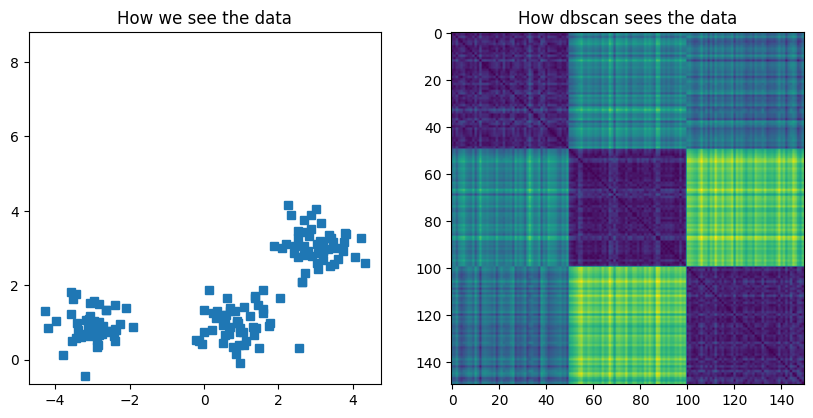

In [2]:
## Create data

nPerClust = 50

# blur around centroid (std units)
blur = .5

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a list
data = np.transpose( np.concatenate((a,b,c),axis=1) )

# show the data
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].plot(data[:,0],data[:,1],'s')
ax[0].set_title('How we see the data')
ax[0].axis('square')


### distance matrix
D = np.zeros((len(data),len(data)))
for i in range(len(D)):
    for j in range(len(D)):
        D[i,j] = np.sqrt( (data[i,0]-data[j,0])**2 + (data[i,1]-data[j,1])**2 )

ax[1].imshow(D)
ax[1].set_title('How dbscan sees the data')
plt.show()

[[ 0.85764963  0.97229432]
 [-2.93024201  0.94052355]
 [ 3.04582766  3.06581756]]


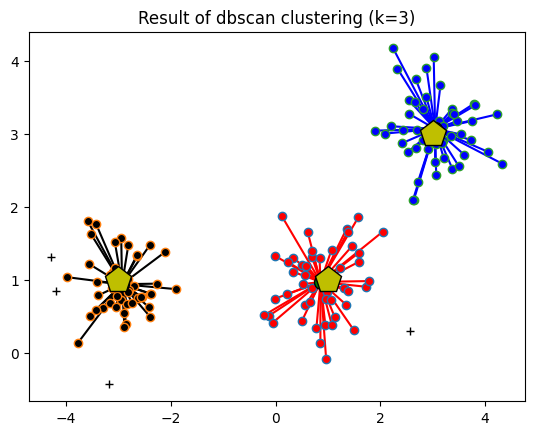

In [3]:
## dbscan

clustmodel = DBSCAN(eps=.6,min_samples=6).fit(data)
groupidx = clustmodel.labels_

# number of clusters
nclust = max(groupidx)+1 # +1 for indexing

# compute cluster centers
cents = np.zeros((nclust,2))
for ci in range(nclust):
    cents[ci,0] = np.mean(data[groupidx==ci,0])
    cents[ci,1] = np.mean(data[groupidx==ci,1])
print(cents)

# draw lines from each data point to the centroids of each cluster
lineColors = 'rkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgm'
for i in range(len(data)):
    if groupidx[i]==-1:
        plt.plot(data[i,0],data[i,1],'k+')
    else:
        plt.plot([ data[i,0], cents[groupidx[i],0] ],[ data[i,1], cents[groupidx[i],1] ],lineColors[groupidx[i]])
        

# now draw the raw data in different colors
for i in range(nclust):
    plt.plot(data[groupidx==i,0],data[groupidx==i,1],'o',markerfacecolor=lineColors[i])

# and now plot the centroid locations
plt.plot(cents[:,0],cents[:,1],'ko',markerfacecolor='g',markersize=10)
plt.title('Result of dbscan clustering (k=' + str(nclust) + ')')

# finally, the "ground-truth" centers
plt.plot(A[0],A[1],'kp',markersize=20,markerfacecolor='y')
plt.plot(B[0],B[1],'kp',markersize=20,markerfacecolor='y')
plt.plot(C[0],C[1],'kp',markersize=20,markerfacecolor='y')

plt.show()

/tmp/ipykernel_167812/971965487.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  aspect=20,origin='lower',cmap=cm.get_cmap('jet',10))
/tmp/ipykernel_167812/971965487.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  aspect=20,origin='lower',cmap=cm.get_cmap('jet',10))


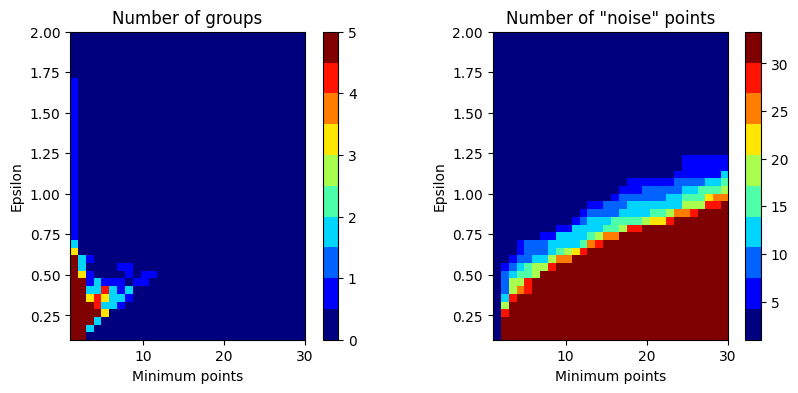

In [9]:
from matplotlib import cm

## testing the parameter space

# parameter ranges
epsilons = np.linspace(.1,2,40)
minpoints = np.arange(1,31)

# initialize results matrix
results = np.zeros((len(epsilons),len(minpoints),2))

for ei in range(len(epsilons)):
    for di in range(len(minpoints)):
        clustmodel = DBSCAN(eps=epsilons[ei],min_samples=minpoints[di]).fit(data)
        groupidx = clustmodel.labels_
        results[ei,di,0] = max(groupidx)
        results[ei,di,1] = sum(groupidx==-1)



# for colormap discretization
from pylab import cm

fig,ax = plt.subplots(1,2,figsize=(10,4))
aa = ax[0].imshow(results[:,:,0],vmin=0,vmax=5,
                  extent=[minpoints[0],minpoints[-1],epsilons[0],epsilons[-1]],
                  aspect=20,origin='lower',cmap=cm.get_cmap('jet',10))
ax[0].set_xlabel('Minimum points')
ax[0].set_ylabel('Epsilon')
ax[0].set_title('Number of groups')
plt.colorbar(aa,ax=ax[0])

aa = ax[1].imshow(results[:,:,1],vmin=1,vmax=len(data)/3,
                  extent=[minpoints[0],minpoints[-1],epsilons[0],epsilons[-1]],
                  aspect=20,origin='lower',cmap=cm.get_cmap('jet',10))
ax[1].set_xlabel('Minimum points')
ax[1].set_ylabel('Epsilon')
ax[1].set_title('Number of "noise" points')
plt.colorbar(aa,ax=ax[1])

plt.show()

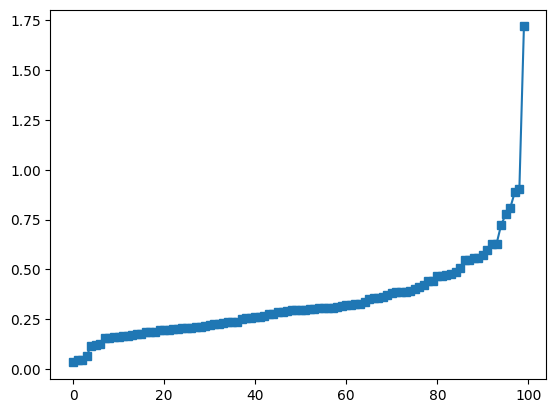

In [10]:
## determining the appropriate parameters

# NOTE: The thesis I linked in the video is no longer available. 
#    There are several methods to determine an appropriate epsilon
#    parameter, depending on the nature of the data and level of
#    sophistication required. I hope the references below are helpful; you
#    can also google around to find more tips for picking parameters.
# 
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
# https://core.ac.uk/download/pdf/219373759.pdf
# https://www.biorxiv.org/content/10.1101/2020.07.09.195784v2.full.pdf
 

D = np.zeros(len(data))

for i in range(len(data)):
    # compute distance
    d = np.sqrt( (data[i,0]-data[:,0])**2 + (data[i,1]-data[:,1])**2 )
    
    # distance to 3rd closest point
    d = np.sort(d)
    D[i] = d[2]
    
plt.plot(np.sort(D),'s-')
plt.show()

(2000, 2)


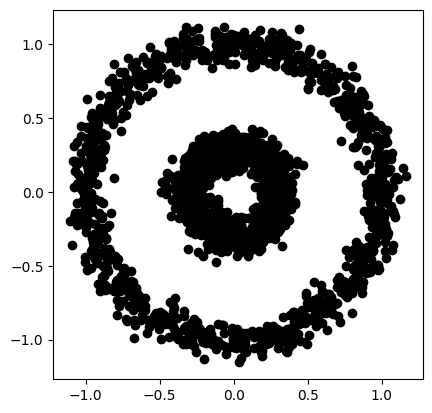

In [11]:
## Try again with nonlinear clusters

N = 1000
th = np.linspace(0,2*np.pi,N)

# create the two circles
data1 = np.array((np.cos(th), np.sin(th))) + np.random.randn(2,N)/15
data2 = .3*np.array((np.cos(th), np.sin(th))) + np.random.randn(2,N)/15

# put them together into one dataset
circdata = np.hstack((data1,data2)).T
print(np.shape(circdata))

# plot
plt.plot(circdata[:,0],circdata[:,1],'ko')
plt.axis('square')
plt.show()

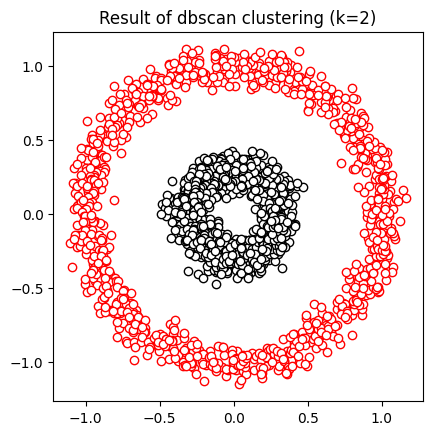

In [12]:
## dbscan

clustmodel = DBSCAN(eps=.2,min_samples=6).fit(circdata)
groupidx = clustmodel.labels_

nclust = max(groupidx)+1 # +1 for indexing

# now draw the raw data in different colors
for i in range(nclust):
    plt.plot(circdata[groupidx==i,0],circdata[groupidx==i,1],'o',color=lineColors[i],markerfacecolor='w')

# and plot unassigned data
plt.plot(circdata[groupidx==-1,0],circdata[groupidx==-1,1],'k+')
plt.axis('square')
plt.title('Result of dbscan clustering (k=' + str(nclust) + ')')

plt.show()